In [7]:
import os
import json
import matplotlib.pyplot as plt

In [90]:
# Collect organizations and their co-occurences

orgs = []
texts = []
years = []
occurences = []

dir = 'json/'
files = os.listdir(dir)

for index, filename in enumerate(files):
    
    f = open(dir + filename)
    r = f.read()
    parsed = json.loads(r)
    
    # Set tags and remove excessive values

    tags = parsed[0]['story_tags']

    if len(tags) > 1000:
        continue

    # Set time

    try:
        year = int(parsed[0]['publish_date'].split(' ')[0].split('-')[0])
    except:
        continue

    # Collect organizations' names
    
    _names = []

    for tag in tags:
        if (tag['tag_set'] == 'cliff_organizations'):
            _names.append(tag['tag'])

    # Collect by name

    # x -> years
    # y -> occurencies

    for n in _names:
        if n in orgs:
            
            index = orgs.index(n)
            texts[index] = texts[index] + _names
            occurences[index] += 1
            
            if year in years[index]:
                years[index][year] += 1
            else:
                years[index][year] = 1
                
        else:
            orgs.append(n)
            texts.append(_names)
            occurences.append(1)
            years.append({year: 1})


# Clean less citates organizations

for index, occurrence in reversed(list(enumerate(occurences))):

    min = 30

    if occurrence < min:
        orgs.pop(index)
        texts.pop(index)
        years.pop(index)
        occurences.pop(index)
    # else:
        # print()
        # print(index, occurrence, orgs[index])
        # print()


print(len(orgs), len(texts), len(years), len(occurences))

print(orgs[0])
print(texts[0])
print(years[0])
print(occurences[0])



97 97 97 97
MIT
['MIT', 'Department of Energy', 'MIT', 'UC Santa Barbara', 'Harper Adams University', 'UCSB', 'PNNL', 'DOE Joint Genome Institute', 'Battelle’s Pacific Northwest National Laboratory', 'University of California, of Santa Barbara', 'MIT', 'U.S. Energy Information Administration', 'Washington Post', 'Shell', 'MIT', 'General Electric', 'Syracuse University', 'National Bureau of Economic Research', 'Center for Energy', 'Rochester Institute of Technology', 'French Economic Observatory', 'MIT', 'Kleiner Perkins Caufield & Byers', 'Sun Microsystems', 'European Union', 'U.N.', 'EPA', 'E.U.', 'MIT', 'Dogwood Alliance', 'Southern Environmental Law Center', 'European Commission', 'North Carolina State University', 'Oregon State University', 'wood energy', 'GCB', 'new European Commission', 'U.S. Industrial Pellet Association', 'Enviva Biomass', 'Sampson County mill', 'MIT', 'Saturn', 'Harvard', 'herald', 'Harvard University', 'MIT', 'Massachusetts Institute of Technology', 'Imperial

In [98]:
# Linear regression

import numpy as np
from sklearn.linear_model import LinearRegression

slopes = []
colors = []

for year in years:

    y = list(year.values())
    x = list(year.keys())

    print()
    print(x, y)

    x = np.array(x).reshape((-1, 1))
    
    model = LinearRegression().fit(x, y)
    slope = model.coef_
    score = model.score(x, y)
    print('slope', slope)
    print('score', score)

    slopes.append(slope)

    if slope > .5:
        colors.append('red')
    else:
        if slope > -.5:
            colors.append('orange')
        else:
            colors.append('blue')



# x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
# y = np.array([5, 20, 14, 32, 22, 38])


[2017, 2016, 2015, 2011, 2014, 2013, 2018, 2019, 2012] [5, 9, 7, 2, 5, 3, 6, 2, 2]
slope [0.33333333]
score 0.1327433628318584

[2013, 2014, 2015, 2012, 2018, 2011, 2017, 2016, 2019] [18, 10, 10, 6, 12, 3, 10, 12, 3]
slope [0.06666667]
score 0.001465201465201571

[2013, 2012, 2016, 2014, 2015, 2017, 2018] [14, 14, 9, 6, 3, 4, 2]
slope [-1.89285714]
score 0.6612523540489657

[2014, 2012, 2013, 2015, 2018, 2016, 2017, 2011, 2019] [57, 34, 59, 57, 40, 63, 44, 19, 5]
slope [-1.03333333]
score 0.020338624338624323

[2011, 2014, 2015, 2016, 2012, 2017, 2018, 2013, 2019] [13, 17, 21, 12, 17, 9, 5, 13, 2]
slope [-1.55]
score 0.49555003819710597

[2011, 2014, 2013, 2017, 2019, 2018, 2015, 2016, 2012] [7, 15, 17, 7, 5, 10, 13, 11, 3]
slope [-0.18333333]
score 0.011487341772151827

[2018, 2011, 2012, 2013, 2016, 2019, 2015, 2014, 2017] [10, 24, 10, 10, 10, 2, 10, 7, 4]
slope [-1.61666667]
score 0.5158442982456086

[2015, 2016, 2018, 2012, 2011, 2013, 2014, 2019, 2017] [18, 11, 16, 4, 2, 3, 10, 2

In [103]:
# Term Frequency Matrix

import textacy

doc_term_matrix, dictionary = textacy.representations.build_doc_term_matrix(texts, tf_type="linear", idf_type="smooth")

 * creating mesh with size 32 32
 * filling mesh


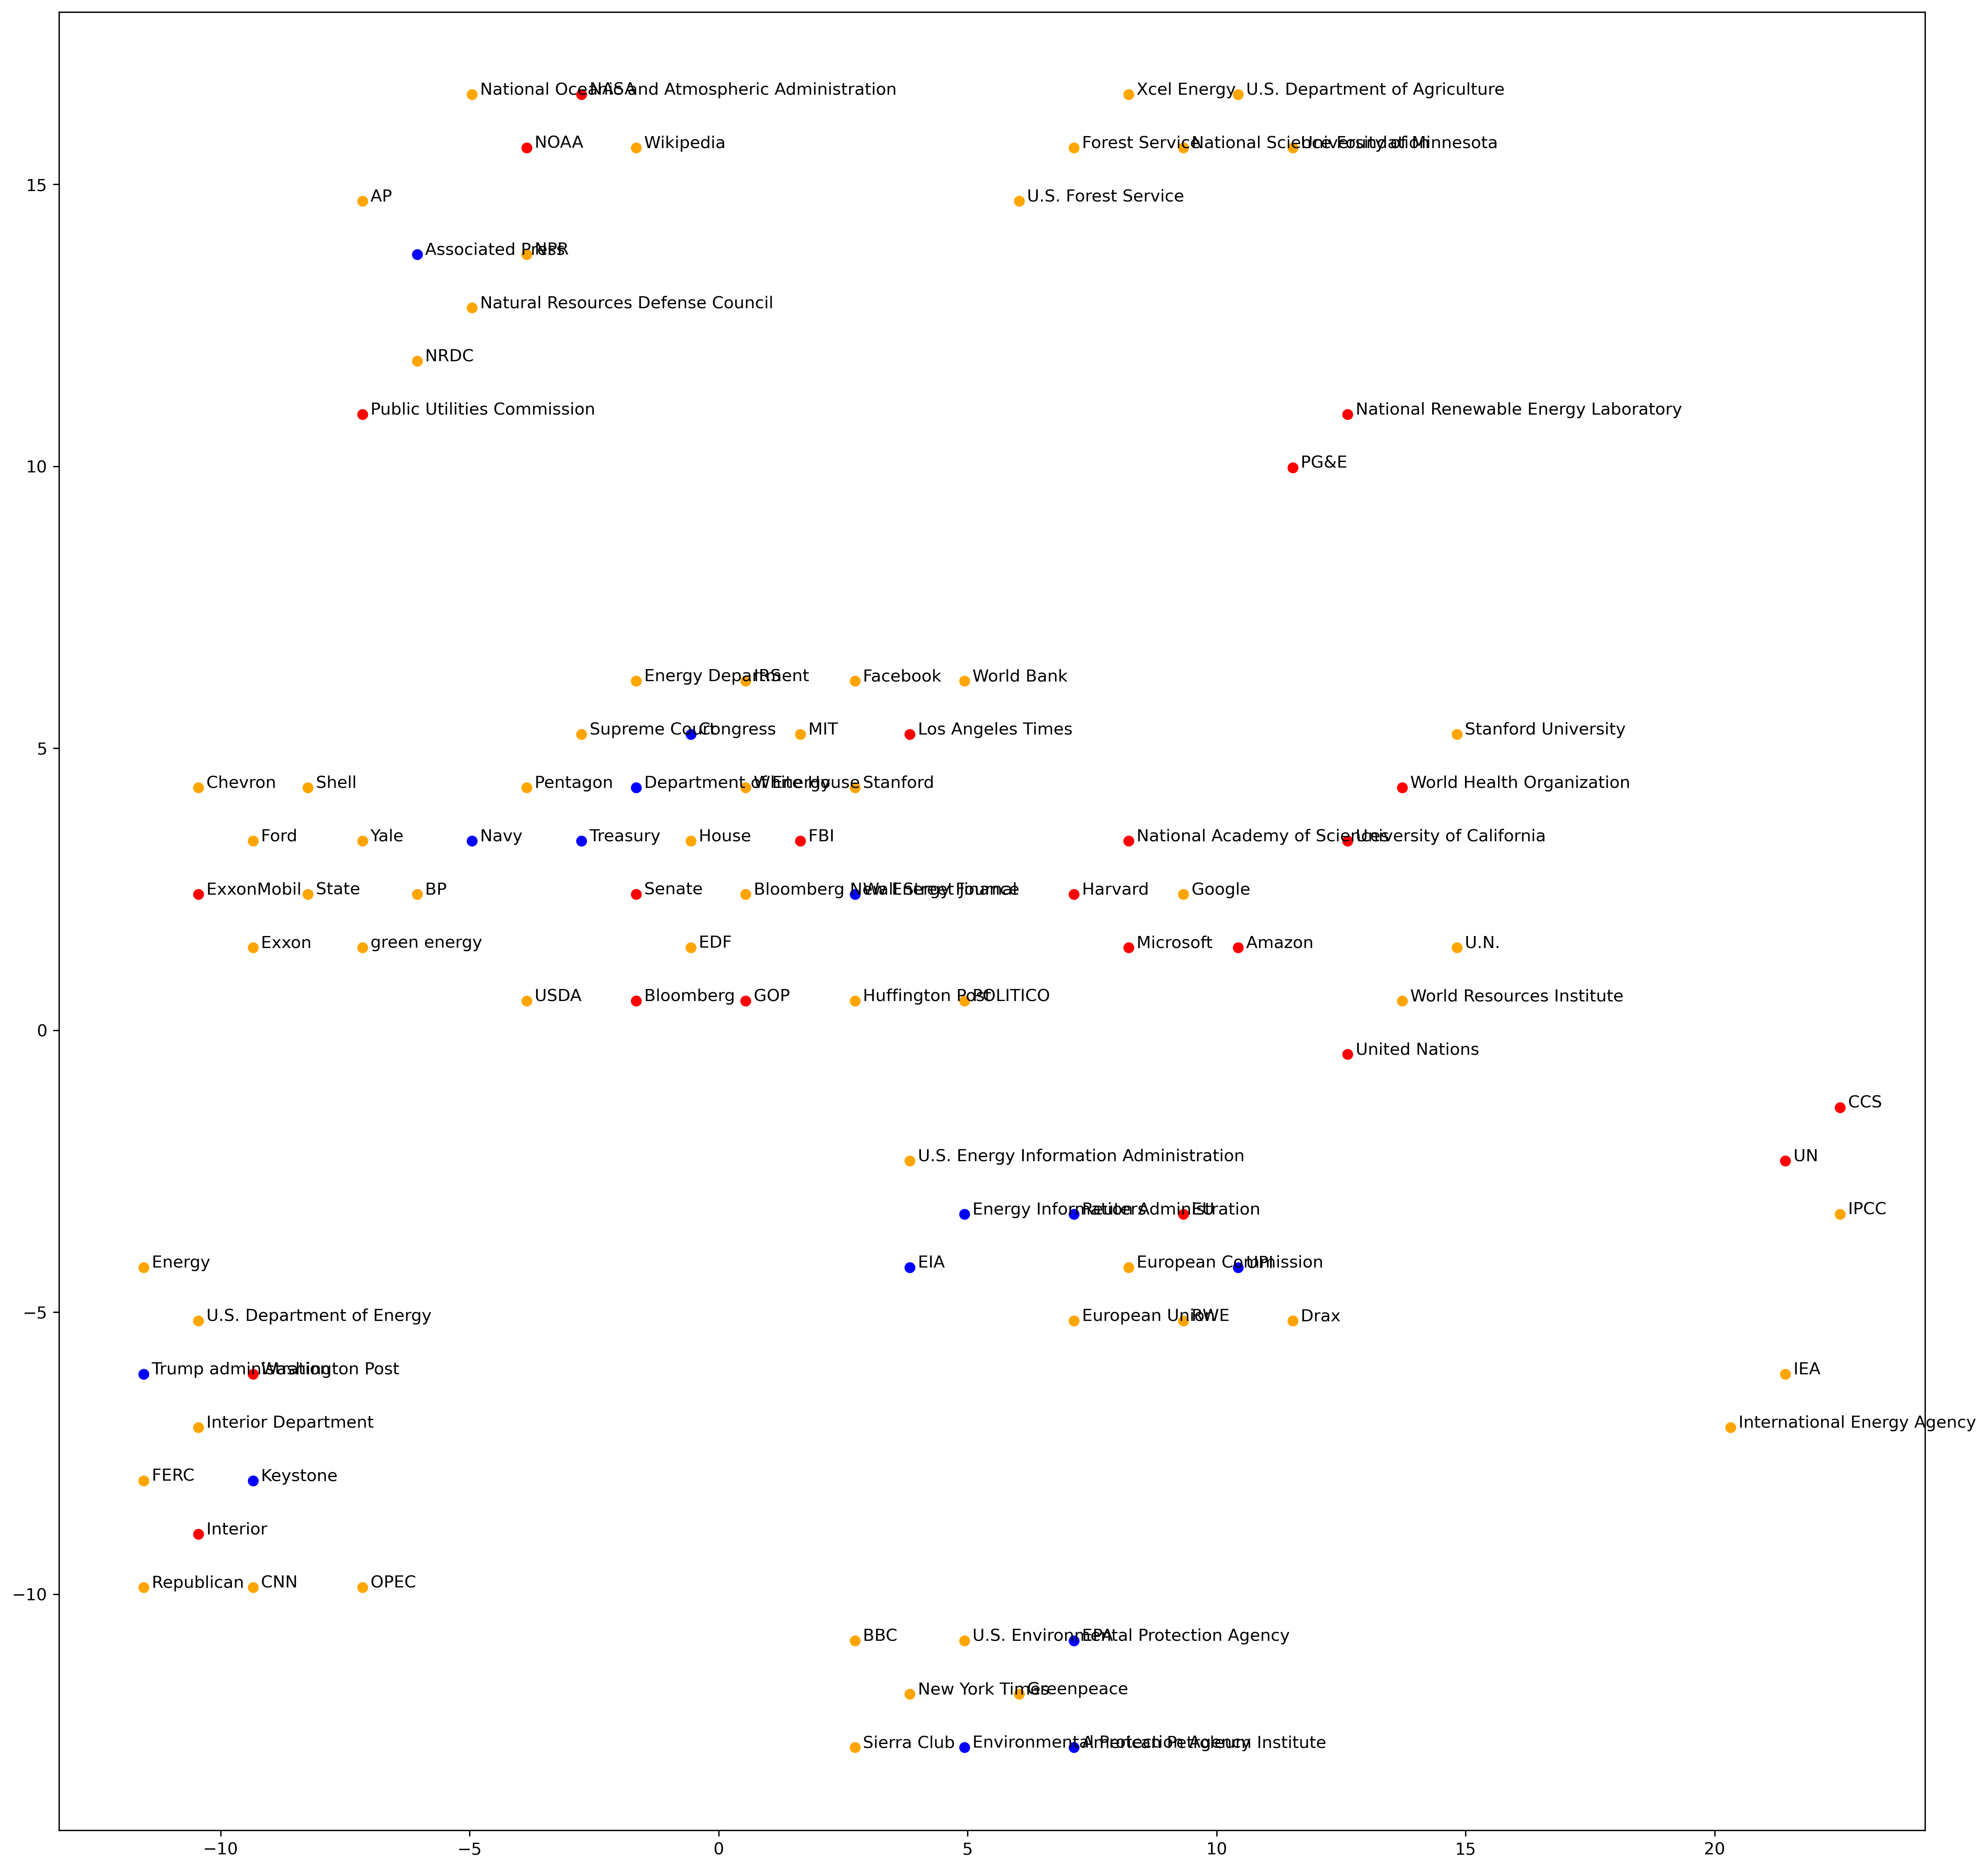

In [100]:
# UMAP

import umap
import matplotlib.pyplot as plt
from pointgrid import align_points_to_grid


reducer = umap.UMAP(n_components=2, n_neighbors=2, min_dist=0.01, metric='cosine')
# reducer = umap.UMAP(random_state=2, n_components=2, n_neighbors=2, min_dist=0.01, metric='hellinger')

embedding = reducer.fit_transform(doc_term_matrix)
embedding = align_points_to_grid(embedding)

x = embedding[:, 0]; y = embedding[:, 1]

plt.figure(figsize=(20,20), dpi=300)
plt.scatter(x, y, s=30, c=colors)

for i, txt in enumerate(orgs):
    text = plt.annotate(' ' + orgs[i], (x[i] + .05, y[i]))
    text.set_fontsize(10)